> ### Project Name: Offline Handwriting Recognition using Deep Learning
  ### Author Name: Chetan Malhotra, 14SCSE101072

# Implementing a handwritten digit recognition system using using a Mulit-Layer Perceptron Feed-Forward Neural Network and a Convolutional Neural Network

## What is Keras?

Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.

<img src="https://github.com/debuggermalhotra/8th-sem-project/blob/master/keras/img/keras.png?raw=true">

## Why Keras?

Keras is the recommended library for deep learning in Python, especially for beginners. Its minimalistic, modular approach makes it a breeze to get deep neural networks up and running.

## Loading the MNIST dataset

### A little about the dataset I am going to use i.e the MNIST dataset

The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.
It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.
The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image by computing the center of mass of the pixels, and translating the image so as to position this point at the center of the 28x28 field.

In [1]:
from keras.datasets import mnist    #keras by default is shipped with certain datasets, MNIST is one of them

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


I will now plot 4 images of random numbers from the data-set as gray scale so that I get a rough idea of our dataset

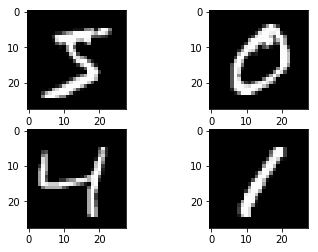

In [2]:
import matplotlib.pyplot as plt

plt.subplot(221)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))
plt.show()

# Beginning with building a mulit-layer perceptron

## What is a Multi-Layer Perceptron Feed Forward Neural Network?

A multilayer perceptron (MLP) is a class of feedforward artificial neural network. An MLP consists of at least three layers of nodes. Except for the input nodes, each node is a neuron that uses a nonlinear activation function. MLP utilizes a supervised learning technique called backpropagation for training. Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable.

### I will use the accuracy of this model to compare it to the deep learning model i.e a simple CNN to depict how deep learning increases the effeciency of task like handwriting recognition

In [3]:
#importing all the classs and functions

import numpy as np
from keras.datasets import mnist
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [4]:
#setting random seed value for reproducibilty 
seed=7
np.random.seed(seed)

For a multi-layer perceptron model I have to reduce the images down into a vector of pixels. In this case the 28×28 sized images will be 784 pixel input values.
I will do this transformation easily using numpy so that the 28x28 images are flattened to a 7b4 vector for each image because that is what the computer understands.

In [5]:
num_pixels = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape(x_train.shape[0], num_pixels).astype('float32')
x_test = x_test.reshape(x_test.shape[0], num_pixels).astype('float32')

The pixel values are gray scale between 0 and 255. It is said that it is almost always a good idea to perform some scaling of input values when using neural network models. Because the scale is well known and well behaved, I will now normalize the pixel values to the range 0 and 1 by dividing each value by the maximum of 255.

In [6]:
x_train=x_train/255
x_test=x_test/255

Since the digits I am recognizing are 0-9, the output variable will be an integer from 0 to 9. Thus, this is a multi-class classification problem. This indicates that I have to use a one hot encoding of the class values, transforming the vector of class integers into a binary matrix.

In [7]:
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

I will now define my model that is the MLP neural network

In [8]:
def baseline_model():
    #model creation
    model=Sequential() #model with linear stack of layers
    #input layer
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))  
    #output layer
    model.add(Dense(num_classes,kernel_initializer='normal', activation='softmax'))
    
    #model compilation
    model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
    return model

This model is a simple neural network with one hidden layer where the number of neurons are equal to 784 which is equal to the number of inputs.<br>
I have used a rectifier activation function to activate the neurons in hidden layer, also known as ReLu(A rectified Linear Unit).<br>
>  A rectified linear unit has output 0 if the input is less than 0, and raw output otherwise. That is, if the input is greater than 0, the output is equal to the input. ReLUs' machinery is more like a real neuron in your body.<br>
![relu](https://github.com/debuggermalhotra/8th-sem-project/blob/master/keras/img/relu.png?raw=true)

A softmax activation function is used on the output layer to turn the outputs into probability-like values and allow one class of the 10(0-9 digits) to be selected as the model’s output prediction.<br>
> The softmax function squashes the outputs of each unit to be between 0 and 1, just like a sigmoid function. But it also divides each output such that the total sum of the outputs is equal to 1 (check it on the figure above).
The output of the softmax function is equivalent to a categorical probability distribution, it tells you the probability that any of the classes are true.<br>
![softmax](https://github.com/debuggermalhotra/8th-sem-project/blob/master/keras/img/softmax.png?raw=true)

Logarithmic loss is used as the loss function (called categorical_crossentropy in Keras) and the efficient ADAM gradient descent algorithm is used to learn the weights.

I will now fit and evaluate the model. The model is to be fit over 10 epochs with updates every 200 images.<br>
>An Epoch describes the number of times the algorithm sees the entire data set. So, each time the algorithm has seen all samples in the dataset, an epoch has completed.


I will use the test data as the validation dataset, allowing me to see the skill of the model as it trains. A verbose value of 2 is used to reduce the output to one line for each training epoch.

In [9]:
from keras.models import Model
# building the model
model = baseline_model()
# fitting the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
6s - loss: 0.2781 - acc: 0.9212 - val_loss: 0.1408 - val_acc: 0.9571
Epoch 2/10
6s - loss: 0.1114 - acc: 0.9675 - val_loss: 0.0920 - val_acc: 0.9711
Epoch 3/10
6s - loss: 0.0719 - acc: 0.9793 - val_loss: 0.0785 - val_acc: 0.9765
Epoch 4/10
6s - loss: 0.0502 - acc: 0.9857 - val_loss: 0.0741 - val_acc: 0.9766
Epoch 5/10
6s - loss: 0.0373 - acc: 0.9893 - val_loss: 0.0676 - val_acc: 0.9790
Epoch 6/10
6s - loss: 0.0270 - acc: 0.9926 - val_loss: 0.0640 - val_acc: 0.9803
Epoch 7/10
6s - loss: 0.0210 - acc: 0.9947 - val_loss: 0.0613 - val_acc: 0.9806
Epoch 8/10
6s - loss: 0.0139 - acc: 0.9969 - val_loss: 0.0606 - val_acc: 0.9814
Epoch 9/10
6s - loss: 0.0106 - acc: 0.9980 - val_loss: 0.0579 - val_acc: 0.9817
Epoch 10/10
6s - loss: 0.0082 - acc: 0.9984 - val_loss: 0.0632 - val_acc: 0.9805


In [10]:
#Final evaluation of the model
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0631892243262
Test accuracy: 0.9805


## Therefore, Model accuracy comes out to be 98.05%

<br>
<br>
# Now I will move to building a Simple Convolutional Network 

## What are Convolutional Neural Networks?

Convolutional Neural Networks (CNN's) are multi-layer neural networks (sometimes up to 17 or more layers) that assume the input data to be images. By making this requirement, CNN's can drastically reduce the number of parameters that need to be tuned. Therefore, CNN's can efficiently handle the high dimensionality of raw images. The whole network still expresses a single differentiable score function: from the raw image pixels on one end to class scores at the other. And they still have a loss function (e.g. SVM/Softmax) on the last (fully-connected) layer and all the tips/tricks we develop for learning regular Neural Networks still apply.<br>
![cnn](https://github.com/debuggermalhotra/8th-sem-project/blob/master/keras/img/cnn.png?raw=true)

#### Layers used to build ConvNets

As we described above, a simple ConvNet is a sequence of layers, and every layer of a ConvNet transforms one volume of activations to another through a differentiable function. We use three main types of layers to build ConvNet architectures: Convolutional Layer, Pooling Layer, and Fully-Connected Layer (exactly as seen in regular Neural Networks). We will stack these layers to form a full ConvNet architecture. <br>
Example Architecture: Overview. We will go into more details below, but a simple ConvNet for CIFAR-10 classification could have the architecture [INPUT - CONV - RELU - POOL - FC]. In more detail:<br>

* INPUT [32x32x3] will hold the raw pixel values of the image, in this case an image of width 32, height 32, and with three color channels R,G,B.<br>
* CONV layer will compute the output of neurons that are connected to local regions in the input, each computing a dot product between their weights and a small region they are connected to in the input volume. This may result in volume such as [32x32x12] if we decided to use 12 filters.<br>
* RELU layer will apply an elementwise activation function, such as the max(0,x)max(0,x) thresholding at zero. This leaves the size of the volume unchanged ([32x32x12]).<br>
* POOL layer will perform a downsampling operation along the spatial dimensions (width, height), resulting in volume such as [16x16x12].<br>
* FC (i.e. fully-connected) layer will compute the class scores, resulting in volume of size [1x1x10], where each of the 10 numbers correspond to a class score, such as among the 10 categories of CIFAR-10. As with ordinary Neural Networks and as the name implies, each neuron in this layer will be connected to all the numbers in the previous volume.
<br>
<br>
In this way, ConvNets transform the original image layer by layer from the original pixel values to the final class scores. Note that some layers contain parameters and other don’t. In particular, the CONV/FC layers perform transformations that are a function of not only the activations in the input volume, but also of the parameters (the weights and biases of the neurons). On the other hand, the RELU/POOL layers will implement a fixed function. The parameters in the CONV/FC layers will be trained with gradient descent so that the class scores that the ConvNet computes are consistent with the labels in the training set for each image.

In [11]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [12]:

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

Now I will load the MNIST dataset and reshape it so that it is suitable for training a CNN. According to Keras documentation, in keras, the layers used for two-dimensional convolutions expect pixel values with the dimensions [pixels][width][height].<br>
So, in the case of RGB, the first dimension 'pixels' would be 3 for the red, green and blue components and it will be like having 3 image inputs for every color image. In the case of MNIST where the pixel values are gray scale, the pixel dimension is set to 1.


In [13]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [14]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [15]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


Convert class vectors to binary class matrices

In [16]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Now I will define my neural network model.<br><br>
Below summarizes the network architecture:<br>
1. The first hidden layer is a convolutional layer called a Convolution2D. The layer has 32 feature maps, which with the size of 5×5 and a rectifier activation function. This is the input layer, expecting images with the structure defined above [pixels][width][height].
2. Next we define a pooling layer that takes the max called MaxPooling2D. It is configured with a pool size of 2×2.
3. The next layer is a regularization layer using dropout called Dropout. It is configured to randomly exclude 20% of neurons in the layer in order to reduce overfitting.
4. Next is a layer that converts the 2D matrix data to a vector called Flatten. It allows the output to be processed by standard fully connected layers.
5. Next a fully connected layer made of 128 neurons and rectifier activation function.
5. Finally, the output layer has 10 neurons for the 10 classes(0-9 digits) and a softmax activation function to output probability-like predictions for each class.

In [17]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

I will evaluate the model the same way as before with the multi-layer perceptron. The CNN is fit over 10 epochs with a batch size of 200, which will also produce the same number of iterations.

In [18]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 169s - loss: 0.3377 - acc: 0.8986 - val_loss: 0.0874 - val_acc: 0.9745
Epoch 2/12
60000/60000 [==============================] - 169s - loss: 0.1168 - acc: 0.9656 - val_loss: 0.0575 - val_acc: 0.9813
Epoch 3/12
60000/60000 [==============================] - 169s - loss: 0.0908 - acc: 0.9730 - val_loss: 0.0460 - val_acc: 0.9840
Epoch 4/12
60000/60000 [==============================] - 169s - loss: 0.0740 - acc: 0.9772 - val_loss: 0.0402 - val_acc: 0.9867
Epoch 5/12
60000/60000 [==============================] - 169s - loss: 0.0652 - acc: 0.9810 - val_loss: 0.0369 - val_acc: 0.9875
Epoch 6/12
60000/60000 [==============================] - 169s - loss: 0.0603 - acc: 0.9818 - val_loss: 0.0333 - val_acc: 0.9891
Epoch 7/12
60000/60000 [==============================] - 169s - loss: 0.0536 - acc: 0.9841 - val_loss: 0.0337 - val_acc: 0.9890
Epoch 8/12
60000/60000 [=======================

In [21]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0322662092952
Test accuracy: 0.9895


## Therefore, Model accuracy comes out to be 98.95%

# This clearly indicates that Deep Neural Networks like Convolutional Network will be best suitable for task like offline handwriting recognition